## PyTorch MultiLayerPerceptron (MLP) Logistic Regression


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.__version__

'1.8.1'

In [4]:
# Importing the dataset

import sys
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
default = pd.read_csv('Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
X = default.iloc[:,1:].values  
y = default.loc[:,'default']
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0]) # Encode student
y =  LabelEncoder().fit_transform(default.default) # Encode default
X.shape,y.shape,np.sum(y)

((10000, 3), (10000,), 333)

In [6]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state = 42)

# Feature Scaling

sc = MinMaxScaler()
X_train[:,1:] = sc.fit_transform(X_train[:,1:])
X_test[:,1:] = sc.transform(X_test[:,1:])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 3), (2000, 3), (8000,), (2000,))

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [8]:
X = default.iloc[:,1:].values  
y = default.loc[:,'default']
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0]) # Encode student
y =  LabelEncoder().fit_transform(default.default) # Encode degault
X.shape,y.shape,np.sum(y)

((10000, 3), (10000,), 333)

In [9]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size = 0.5, 
                                                    random_state = 1)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert data into torch tensors
X_train_t = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test_t = torch.from_numpy(X_test.astype(np.float32)).to(device)
y_train_t = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1)).to(device)
y_test_t = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1)).to(device)

X_train_t.shape, X_test_t.shape, y_train_t.shape, y_test_t.shape

(torch.Size([5000, 3]),
 torch.Size([5000, 3]),
 torch.Size([5000, 1]),
 torch.Size([5000, 1]))

#### Create the classification model class

https://pytorch.org/docs/stable/nn.html

In [10]:
torch.manual_seed(1)

# Create the classification model class

class LogRegress(nn.Module):
    def __init__(self,num_in,num_out):
        super(LogRegress, self).__init__() 
        self.linear = nn.Linear(num_in, num_out) 
        self.sigmoid = nn.Sigmoid()
  
    def forward(self, x): 
        y_pred = self.linear(x)
        return self.sigmoid(y_pred) 
    
model = LogRegress(X_train.shape[1],1)
model.to(device) # Send to device before specifing optimizer

LogRegress(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

#### Loss and optimizer

In [11]:
# Loss and optimizer
criterion = nn.BCELoss() #Binary Cross Entropy
optimizer = torch.optim.Adam(model.parameters())

#### Train the model

In [12]:
# Train the model
n_epochs = 2000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  
  optimizer.zero_grad() # zero the parameter gradients

  outputs = model(X_train_t) # Forward pass via __call__, outputs is a tensor
    
  loss = criterion(outputs, y_train_t) # Calculate the loss
    
  loss.backward() # Computes the Gradients
  optimizer.step() # Updates the weights

  # Get test loss
  outputs_test = model(X_test_t)
  loss_test = criterion(outputs_test, y_test_t)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/2000, Train Loss: 0.8264, Test Loss: 0.8282
Epoch 100/2000, Train Loss: 0.7929, Test Loss: 0.7942
Epoch 150/2000, Train Loss: 0.7624, Test Loss: 0.7633
Epoch 200/2000, Train Loss: 0.7344, Test Loss: 0.7349
Epoch 250/2000, Train Loss: 0.7083, Test Loss: 0.7085
Epoch 300/2000, Train Loss: 0.6838, Test Loss: 0.6837
Epoch 350/2000, Train Loss: 0.6607, Test Loss: 0.6604
Epoch 400/2000, Train Loss: 0.6388, Test Loss: 0.6383
Epoch 450/2000, Train Loss: 0.6180, Test Loss: 0.6173
Epoch 500/2000, Train Loss: 0.5983, Test Loss: 0.5975
Epoch 550/2000, Train Loss: 0.5795, Test Loss: 0.5785
Epoch 600/2000, Train Loss: 0.5615, Test Loss: 0.5605
Epoch 650/2000, Train Loss: 0.5444, Test Loss: 0.5432
Epoch 700/2000, Train Loss: 0.5279, Test Loss: 0.5267
Epoch 750/2000, Train Loss: 0.5122, Test Loss: 0.5109
Epoch 800/2000, Train Loss: 0.4971, Test Loss: 0.4958
Epoch 850/2000, Train Loss: 0.4826, Test Loss: 0.4812
Epoch 900/2000, Train Loss: 0.4687, Test Loss: 0.4673
Epoch 950/2000, Train Loss: 0

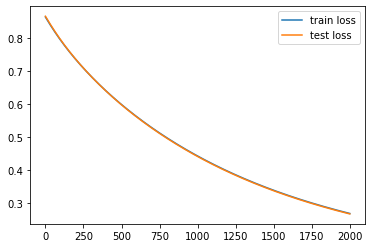

In [13]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend();


#### Model prediction and accuracy

In [14]:

with torch.no_grad():
  p_train = model(X_train_t)  ## Predict
  p_train = np.round(p_train.cpu().numpy())
  train_acc = np.mean(y_train_t.cpu().numpy() == p_train) # Get accuracy

  p_test = model(X_test_t) ## Predict
  p_test = np.round(p_test.cpu().numpy())
  test_acc = np.mean(y_test_t.cpu().numpy() == p_test) # Get accuracy
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9668, Test acc: 0.9666


In [15]:
type(y_test),type(y_test_t)

(numpy.ndarray, torch.Tensor)

In [16]:
cm = confusion_matrix(y_test_t.cpu().numpy(), p_test)
cm

array([[4833,    0],
       [ 167,    0]], dtype=int64)

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0058,  0.3536,  0.0311]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-1.3238], device='cuda:0', requires_grad=True)]

### PyTorch Multinomial Regression

In [18]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Data Preprocessing

In [19]:
# Covert to arrays
X = iris.iloc[:,0:4].values
y = iris.loc[:,'species'].values

y =  LabelEncoder().fit_transform(iris.species) # Encode species

In [20]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 1)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert data into torch tensors
X_train_t = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test_t = torch.from_numpy(X_test.astype(np.float32)).to(device)
y_train_t = torch.from_numpy(y_train.astype(np.int64)).to(device)
y_test_t = torch.from_numpy(y_test.astype(np.int64)).to(device)

X_train_t.shape, X_test_t.shape, y_train_t.shape, y_test_t.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [21]:
torch.manual_seed(1)

# Create the classification model class

class LogRegress(nn.Module):
    def __init__(self,num_in,num_out):
        super(LogRegress, self).__init__() 
        self.linear = nn.Linear(num_in, 7)
        self.relu = nn.ReLU()
        self.out = nn.Linear(7,num_out)
        
        #self.out = nn.Softmax() # no softmax. see CrossEntropyLoss() 
  
    def forward(self, x): 
        z = self.relu(self.linear(x))
        return self.out(z) 
    
model = LogRegress(X_train.shape[1],3)
model.to(device) # Send to device before specifing optimizer

LogRegress(
  (linear): Linear(in_features=4, out_features=7, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=7, out_features=3, bias=True)
)

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [22]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters())

In [23]:
y_train_t.shape

torch.Size([120])

In [24]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  
  optimizer.zero_grad() # zero the parameter gradients

  outputs = model(X_train_t) # Forward pass via __call__, outputs is a tensor
    
  loss = criterion(outputs, y_train_t) # Calculate the loss
    
  loss.backward() # Computes the Gradients
  optimizer.step() # Updates the weights

  # Get test loss
  outputs_test = model(X_test_t)
  loss_test = criterion(outputs_test, y_test_t)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.9079, Test Loss: 0.9239
Epoch 100/1000, Train Loss: 0.7574, Test Loss: 0.7789
Epoch 150/1000, Train Loss: 0.6099, Test Loss: 0.6386
Epoch 200/1000, Train Loss: 0.5022, Test Loss: 0.5377
Epoch 250/1000, Train Loss: 0.4203, Test Loss: 0.4617
Epoch 300/1000, Train Loss: 0.3526, Test Loss: 0.3997
Epoch 350/1000, Train Loss: 0.2986, Test Loss: 0.3490
Epoch 400/1000, Train Loss: 0.2575, Test Loss: 0.3087
Epoch 450/1000, Train Loss: 0.2266, Test Loss: 0.2770
Epoch 500/1000, Train Loss: 0.2018, Test Loss: 0.2488
Epoch 550/1000, Train Loss: 0.1810, Test Loss: 0.2222
Epoch 600/1000, Train Loss: 0.1634, Test Loss: 0.1978
Epoch 650/1000, Train Loss: 0.1483, Test Loss: 0.1755
Epoch 700/1000, Train Loss: 0.1356, Test Loss: 0.1561
Epoch 750/1000, Train Loss: 0.1249, Test Loss: 0.1394
Epoch 800/1000, Train Loss: 0.1158, Test Loss: 0.1252
Epoch 850/1000, Train Loss: 0.1081, Test Loss: 0.1133
Epoch 900/1000, Train Loss: 0.1016, Test Loss: 0.1032
Epoch 950/1000, Train Loss: 0

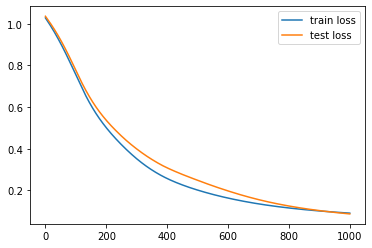

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend();


In [26]:
def predict(tnsr,dev=False):
    with torch.no_grad():
      logits = model(tnsr)
      if dev: logits.to(dev)
      probs = F.softmax(logits)
      probs = probs.cpu().numpy()
      return list(map(np.argmax,probs))

#### Calculate accuracy

In [27]:
preds = predict(X_test_t,device)
np.sum(preds == y_test)/len(preds)

0.9666666666666667

In [28]:
preds[0:5]

[2, 0, 1, 0, 0]

In [ ]:
cm = confusion_matrix(y_test_t.cpu().detach().numpy(), preds)
cm

In [ ]:
list(model.parameters())